In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/ckLibra/Self-Supervised-Depth-Estimation-for-Colonoscopy.git

Cloning into 'Self-Supervised-Depth-Estimation-for-Colonoscopy'...
remote: Enumerating objects: 71, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (66/66), done.
remote: Total 71 (delta 13), reused 47 (delta 1), pack-reused 0
Unpacking objects: 100% (71/71), done.


In [ ]:
%cd /content/Self-Supervised-Depth-Estimation-for-Colonoscopy

/content/Self-Supervised-Depth-Estimation-for-Colonoscopy


In [ ]:
!unrar x /content/drive/MyDrive/CV_depth_colonoscopy_1/Test.rar

In [ ]:
!ls

ablation_study.py   oc_inference.py		syn_test.py
check_unit.py	    oflow			test.py
_config.yml	    options			train.py
correlation	    pix2pixHD_LICENSE.txt	TrainValid
data		    precompute_feature_maps.py	ustc_test.py
encode_features.py  README.md			util
LICENSE		    run_engine.py		vis_mask.py
models		    scripts


In [ ]:
!pip install dominate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#h1

In [ ]:
import os,glob
all_depth = glob.glob("/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/Depth/*Depth*.png")

In [ ]:
import random
from tqdm import tqdm

In [ ]:
random.seed(42)
random.shuffle(all_depth)
train_depth = all_depth[:int(len(all_depth)*0.6)]
val_depth = all_depth[int(len(all_depth)*0.6):int(len(all_depth)*0.7)]
test_depth = all_depth[int(len(all_depth)*0.7):]

In [ ]:
for i in tqdm(test_depth):
    path = "/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_B"
    os.system(f"cp {i} {path}")



100%|██████████| 4805/4805 [01:22<00:00, 58.56it/s]


In [ ]:
all_frame = glob.glob("/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/Frame/*Frame*.png")
print(len(all_frame))
print(all_frame[0])

16016
/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/Frame/T3_L3_3_resized_FrameBuffer_0321.png


In [ ]:
train_frame_name = []
for depth in train_depth:
    train_frame_name.append(os.path.basename(depth).split("Depth")[0]+"FrameBuffer"+os.path.basename(depth).split("Depth")[1])
# for each frame in all_frame, if os.path.basename(frame) is in train_frame_name, add to train_frame
train_frame = []
for frame in all_frame:
    if os.path.basename(frame) in train_frame_name:
        train_frame.append(frame)

    

In [ ]:
val_frame_name = []
for depth in val_depth:
    val_frame_name.append(os.path.basename(depth).split("Depth")[0]+"FrameBuffer"+os.path.basename(depth).split("Depth")[1])
val_frame = []
for frame in all_frame:
    if os.path.basename(frame) in val_frame_name:
        val_frame.append(frame)

    

In [ ]:
test_frame_name = []
for depth in test_depth:
    test_frame_name.append(os.path.basename(depth).split("Depth")[0]+"FrameBuffer"+os.path.basename(depth).split("Depth")[1])
test_frame = []
for frame in all_frame:
    if os.path.basename(frame) in test_frame_name:
      test_frame.append(frame)

In [ ]:
for i in tqdm(test_frame):
    path = "/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A"
    os.system(f"cp {i} {path}")

100%|██████████| 4805/4805 [24:57<00:00,  3.21it/s]


In [ ]:
val_frame = glob.glob("/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/train_A/*Frame*.png")

In [ ]:
train_depth_feature = []
for depth in test_depth:
    train_depth_feature.append(os.path.basename(depth).split("Depth")[0]+os.path.basename(depth).split("Depth")[1])

In [ ]:
train_frame_feature = []
for frame in test_frame:
    train_frame_feature.append(os.path.basename(frame).split("FrameBuffer")[0]+os.path.basename(frame).split("FrameBuffer")[1])


In [ ]:
for i in range(len(train_frame_feature)):
    if train_frame_feature[i] not in train_depth_feature:
        print(i)

In [ ]:
import matplotlib.pyplot as plt
import cv2

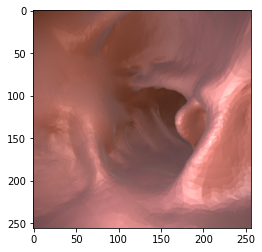

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='plasma')

In [ ]:
%ls

ablation_study.py   oc_inference.py             syn_test.py
check_unit.py       oflow/                      T1.zip
_config.yml         options/                    T2.zip
correlation/        pix2pixHD_LICENSE.txt       test.py
data/               precompute_feature_maps.py  train.py
encode_features.py  README.md                   ustc_test.py
LICENSE             run_engine.py               util/
models/             scripts/                    vis_mask.py


# training

In [ ]:
#!./scripts/train.sh
!python train.py --name colon2depth_512p --batchSize 4  --gpu_ids 0 --label_nc 0 --no_instance --no_vgg_loss --continue_train

------------ Options -------------
batchSize: 4
beta1: 0.5
checkpoints_dir: /content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints
continue_train: True
data_type: 32
dataroot: /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/
debug: False
display_freq: 100
display_winsize: 512
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
input_nc: 3
instance_feat: False
isTrain: True
label_feat: False
label_nc: 0
lambda_feat: 10.0
loadSize: 512
load_features: False
load_pretrain: 
local_rank: 0
lr: 5e-05
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: colon2depth_512p
ndf: 64
nef: 16
netG: global
ngf: 64
niter: 0
niter_decay: 80
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_instance: True
no_lsgan: False
no_vgg_loss: True
norm: instance
num_D: 2
output_nc: 1
phase: train
pool_size: 0
print_freq: 100
resize_or_cr

In [ ]:
#!./scripts/train.sh
!python train.py --name colon2depth_512p --batchSize 4  --gpu_ids 0 --label_nc 0 --no_instance --no_vgg_loss --continue_train

In [ ]:
#!./scripts/train.sh
!python oc_inference.py --name colon2depth_512p --batchSize 4  --gpu_ids 0 --label_nc 0 --no_instance --no_vgg_loss --continue_train

# test

In [70]:
#!./scripts/test.sh
!python ustc_test.py --name colon2depth_512p --no_instance --label_nc 0 --which_epoch 70

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: /content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints
cluster_path: features_clustered_010.npy
data_type: 32
dataroot: /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
how_many: 50
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
loadSize: 512
load_features: False
local_rank: 0
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 1
name: colon2depth_512p
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: True
norm: instance
ntest: inf
onnx: None
output_nc: 1
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: False
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
whic

In [68]:
!python oc_inference.py --name colon2depth_512p --no_instance --label_nc 0 --which_epoch 70

------------ Options -------------
batchSize: 1
beta1: 0.5
checkpoints_dir: /content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints
continue_train: False
data_type: 32
dataroot: /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/
debug: False
display_freq: 100
display_winsize: 512
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
input_nc: 3
instance_feat: False
isTrain: True
label_feat: False
label_nc: 0
lambda_feat: 10.0
loadSize: 512
load_features: False
load_pretrain: 
local_rank: 0
lr: 5e-05
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_layers_D: 3
n_local_enhancers: 1
name: colon2depth_512p
ndf: 64
nef: 16
netG: global
ngf: 64
niter: 0
niter_decay: 80
niter_fix_global: 0
no_flip: False
no_ganFeat_loss: False
no_html: False
no_instance: True
no_lsgan: False
no_vgg_loss: False
norm: instance
num_D: 2
output_nc: 1
phase: train
pool_size: 0
print_freq: 100
resize_or_

In [ ]:
!python syn_test.py --name colon2depth_512p --no_instance --label_nc 0 --which_epoch 70

------------ Options -------------
aspect_ratio: 1.0
batchSize: 1
checkpoints_dir: /content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints
cluster_path: features_clustered_010.npy
data_type: 32
dataroot: /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/
display_winsize: 512
engine: None
export_onnx: None
feat_num: 3
fineSize: 256
fp16: False
gpu_ids: [0]
how_many: 50
input_nc: 3
instance_feat: False
isTrain: False
label_feat: False
label_nc: 0
loadSize: 512
load_features: False
local_rank: 0
max_dataset_size: inf
model: pix2pixHD
nThreads: 2
n_blocks_global: 9
n_blocks_local: 3
n_clusters: 10
n_downsample_E: 4
n_downsample_global: 4
n_local_enhancers: 1
name: colon2depth_512p
nef: 16
netG: global
ngf: 64
niter_fix_global: 0
no_flip: False
no_instance: True
norm: instance
ntest: inf
onnx: None
output_nc: 1
phase: test
resize_or_crop: scale_width
results_dir: ./results/
serial_batches: False
tf_log: False
use_dropout: False
use_encoded_image: False
verbose: False
whic

In [ ]:
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean l1 error...0.036737
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean_rel_l1_error...0.018693
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png rmse...0.060096
min_le: 0.022943 max_le:0.374956 min_rle:0.008488 max_rle:0.919980 min_rmse:0.029223 max_rmse:0.568069
/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_2_resized_FrameBuffer_0294.png
----------------------------------------------------------------------
mle root variance: 0.018836
mrle root variance: 0.035670

In [ ]:
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean l1 error...0.038628
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean_rel_l1_error...0.019879
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png rmse...0.062637
min_le: 0.023716 max_le:0.386879 min_rle:0.008825 max_rle:0.979229 min_rmse:0.030374 max_rmse:0.590552
/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_2_resized_FrameBuffer_0294.png
----------------------------------------------------------------------
mle root variance: 0.020193
mrle root variance: 0.038855

In [ ]:
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean l1 error...0.041340
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png mean_rel_l1_error...0.021479
process image... /content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_1_resized_FrameBuffer_0402.png rmse...0.066793
min_le: 0.024161 max_le:0.395848 min_rle:0.008990 max_rle:1.018618 min_rmse:0.033451 max_rmse:0.610249
/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L1_2_resized_FrameBuffer_0294.png
----------------------------------------------------------------------
mle root variance: 0.021894
mrle root variance: 0.041686

In [81]:
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
def opencv_rainbow(resolution=256):
    # Construct the opencv equivalent of Rainbow,
    """
    ucl_color_data = (
        (0.000, (1.00, 0.00, 0.00)),
        (0.400, (1.00, 1.00, 0.00)),
        (0.600, (0.00, 1.00, 0.00)),
        (0.800, (0.00, 0.00, 1.00)),
        (1.000, (0.60, 0.00, 1.00))
    )
    """
    """
    colormap_jet 
    """
    """
    ucl_color_data = (
        (0.000, (0.60, 0.00, 1.00)),
        (0.400, (0.00, 0.00, 1.00)),
        (0.600, (0.00, 1.00, 0.00)),
        (0.800, (1.00, 1.00, 0.00)),
        (1.000, (1.00, 0.00, 0.00))
    )
    """

    ucl_color_data = (
        (0.000, (1.00, 1.00, 0.00)),
        (0.400, (0.20, 0.67, 0.51)),
        (0.600, (0.20, 0.42, 0.54)),
        (0.800, (0.20, 0.19, 0.47)),
        (1.000, (0.25, 0.02, 0.34))
    )

    """
    ucl_color_data = (
        (0.000, (0.16, 0.04, 1.00)),
        (0.100, (0.16, 0.50, 0.80)),
        (0.178, (0.47, 1.00, 0.04)),
        (1.000, (1.00, 0.00, 0.00))
    )
    """

    return LinearSegmentedColormap.from_list('opencv_rainbow', ucl_color_data, resolution)


In [84]:
predict = np.load('/content/T1_L3_1_resized_FrameBuffer_0381_disp.npy')
predict = cv2.resize(predict[0,0,:,:],(256,256))/100
predict

array([[0.02869224, 0.02982374, 0.02983167, ..., 0.0252429 , 0.02493697,
        0.02470505],
       [0.02882653, 0.02998307, 0.03001537, ..., 0.02532953, 0.02502224,
        0.02478793],
       [0.02918608, 0.03038864, 0.03038185, ..., 0.02563614, 0.02533093,
        0.02506984],
       ...,
       [0.0714138 , 0.07297764, 0.072621  , ..., 0.06581575, 0.06512148,
        0.06493852],
       [0.07113162, 0.0727385 , 0.07239085, ..., 0.0655994 , 0.06490654,
        0.06465326],
       [0.07019392, 0.07191399, 0.07160804, ..., 0.06477042, 0.06414255,
        0.06402673]], dtype=float32)

In [87]:
predict.shape

(256, 256)

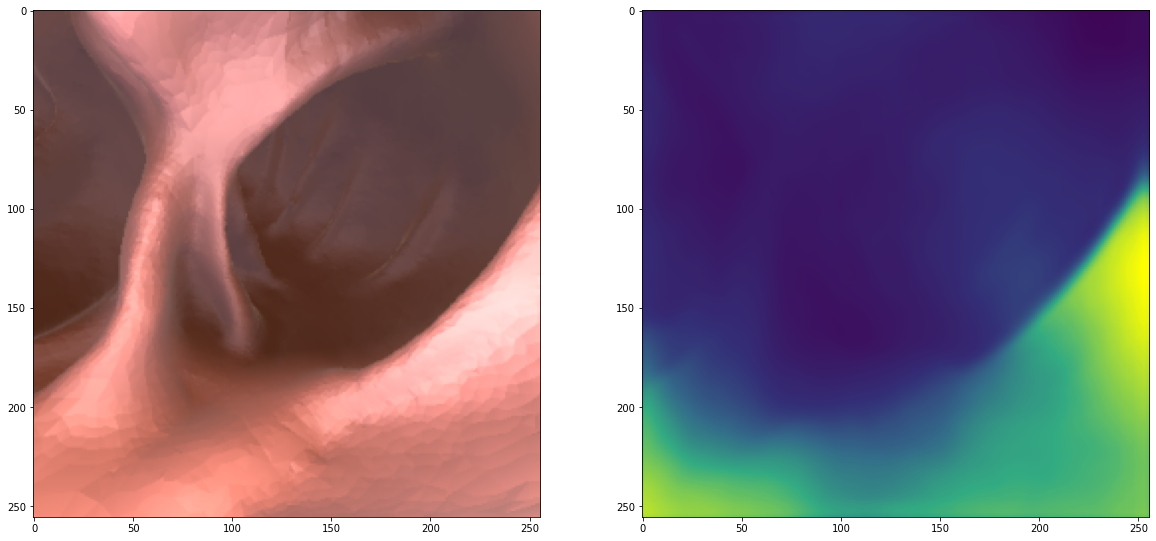

In [95]:
import cv2 
import matplotlib.pyplot as plt
img1 = cv2.imread('/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_A/T1_L3_1_resized_FrameBuffer_0381.png')
img2 = cv2.imread('/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_B/T1_L3_1_resized_Depth_0381.png')
img3 = cv2.imread('/content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints/colon2depth_512p/predict/syn_sample/test_A/T1_L3_1_resized_FrameBuffer_0381.png')
img4 = cv2.imread('/content/drive/MyDrive/CV_depth_colonoscopy_1/checkpoints/colon2depth_512p/predict/syn_sample_2/test_A/T1_L3_1_resized_FrameBuffer_0381.png')
# plt.figure(figsize=(20, 20))
# plt.subplot(1, 5, 1)
# plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
# plt.subplot(1, 5, 2)
# plt.imshow(cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY),cmap =opencv_rainbow() )
# plt.subplot(1, 5, 3)
# plt.imshow(cv2.cvtColor(img3,cv2.COLOR_BGR2RGB))
# plt.subplot(1, 5, 4)
# plt.imshow(cv2.cvtColor(img4,cv2.COLOR_BGR2RGB))
# plt.subplot(1, 5, 5)
# plt.imshow(predict,cmap =opencv_rainbow())
# plt.show()
plt.figure(figsize=(20, 20))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(img1,cv2.COLOR_BGR2RGB))
plt.subplot(1, 2, 2)
plt.imshow(-predict,cmap=opencv_rainbow())
plt.show()

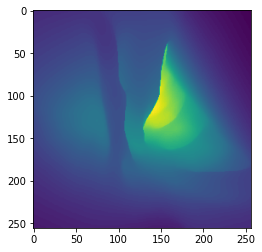

In [77]:
import cv2 
import matplotlib.pyplot as plt
img1 = cv2.imread('/content/drive/MyDrive/CV_depth_colonoscopy_1/datasets/colon2depth/test_B/T1_L1_1_resized_Depth_0000.png',0)
plt.imshow(img1,cmap='viridis')
plt.show()

In [ ]:
import numpy as np

(256, 256)


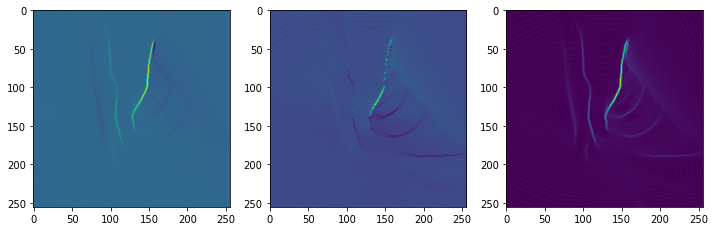

In [76]:
#img1 = cv2.GaussianBlur(img1, (3,3), 0)
img_X = cv2.Sobel(img1, cv2.CV_32F, 1, 0, ksize=3, scale=1, delta=0)
img_Y = cv2.Sobel(img1, cv2.CV_32F, 0, 1, ksize=3, scale=1, delta=0)
img_sol = np.sqrt(img_X**2 + img_Y**2)
print(img_X.shape)
plt.figure(figsize=(12, 12))
plt.subplot(1, 3, 1)
plt.imshow(img_X, cmap='viridis')
plt.subplot(1, 3, 2)
plt.imshow(img_Y, cmap='viridis')
plt.subplot(1, 3, 3)
plt.imshow(img_sol, cmap='viridis')
plt.show()

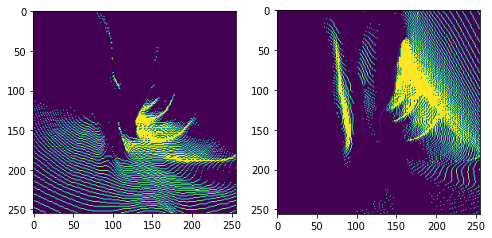

In [79]:
img_dx = img1[1:, :] - img1[:-1, :]
img_dy = img1[:, 1:] - img1[:, :-1]
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.imshow(img_dx, cmap='viridis')
plt.subplot(1, 2, 2)
plt.imshow(img_dy, cmap='viridis')
plt.show()

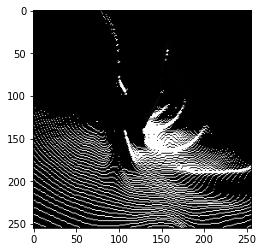

In [ ]:
img_dx = (img1[1:, :] - img1[:-1, :])/10
img_dy = img1[:, 1:] - img1[:, :-1]
plt.imshow(img_dx, cmap='gray')

# Prepare oc sets

In [ ]:
!ls -1 /content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset/Test/Images/*/* | wc -l

15397


In [ ]:
!ls -1 /content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_train_dataset/TrainValid/Images/*/*pair* | wc -l

9241


In [ ]:
!rm -rf /content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset/Test

In [ ]:
import glob,os
for i in glob.glob("/content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset/Test/Images/*"):
  # print(i,len(os.listdir(i)))
  # break
  if  os.path.isdir(i) and len(os.listdir(i))==0:
    os.system(f"rm -rf {i}/")



In [ ]:
%cd /content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset

/content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset


In [ ]:
import numpy as np
import glob,os
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt
for folder in tqdm(glob.glob("/content/drive/MyDrive/CV_depth_colonoscopy_1/video_datasets/oc_test_dataset/Test/Images/*")):
  all_frame = glob.glob(folder+"/*")
  for i in (range(len(all_frame)-1)):
    img1 = cv2.imread(all_frame[i])
    img2 = cv2.imread(all_frame[i+1])
    # ghép 2 ảnh lại với nhau theo chiều ngang và thay img1 bằng ảnh mới
    img_tmp = np.concatenate((img1, img2), axis=1)
    cv2.imwrite(all_frame[i].split(".")[0]+"_pair.jpg", img_tmp)



100%|██████████| 60/60 [07:50<00:00,  7.84s/it]
